
<h1>Global Food Waste Analysis</h1> 

## Introduction

### <i>If just one fourth of lost or wasted food were saved, it could end global hunger.</i> 
         


According to the Food and Agriculture Organization of the United Nations (FAO), the world loses a third of the food it produces. It is claim 


Wasted food requires energy, land, water and labor to produce, store, harvest, transport, package and sell. When we toss out food, we’re throwing away precious resources that could have been used to feed hungry people. And all that rotting food produces three billion tons of greenhouse gases like methane, directly contributing to climate change.

Have you ever heard one third of the Food produced is wasted 


How many times have you heard one third of the food 

Food loss 

The Food Loss and Waste database is the largest online collection of data on both food loss and food waste and causes reported in scientific journals, academic publications, grey literature, countries among others. The database contains data and information from openly accessible databases, reports and studies measuring food loss and waste across food products, stages of the value chain, and geographical areas.

- 5 commodities wuth largest waste
- 5 countries with largest percentage waste 
- 5 correlation between features 
- 5 countries better reducing waste 

## Data Preparation

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math

In this project we are using data from the Food and Agriculture Organization of the United Nations. This particular set of data is downloadable at http://www.fao.org/platform-food-loss-waste/flw-data/en/.

In [3]:
df = pd.read_csv('Data6522.csv')


/home/proctor/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.tail(50)

,m49_code,country,region,cpc_code,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity,food_supply_stage,treatment,cause_of_loss,sample_size,method_data_collection,reference,url,notes
32897,894,Zambia,NaN,118,Millet,2001,3.44,3.44,NaN,"Drying, Harvesting",Harvest,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
32898,894,Zambia,NaN,111,Wheat,2000,2.00,2,NaN,"Drying, Harvesting",Harvest,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
32899,894,Zambia,NaN,111,Wheat,2000,1.30,1.3,NaN,Storage,Storage,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
32900,894,Zambia,NaN,111,Wheat,2000,5.75,5.75,NaN,Storage,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
32901,894,Zambia,NaN,111,Wheat,2000,1.00,1,NaN,Transportation,Transport,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
32902,894,Zambia,NaN,112,Maize (corn),2000,3.90,3.9,NaN,Drying,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
32903,894,Zambia,NaN,112,Maize (corn),2000,2.31,2.31,NaN,Transportation,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
32904,894,Zambia,NaN,112,Maize (corn),2000,4.49,4.49,NaN,Storage,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
32905,894,Zambia,NaN,112,Maize (corn),2000,1.26,1.26,NaN,Transportation,Transport,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
32906,894,Zambia,NaN,112,Maize (corn),2000,5.91,5.91,NaN,"Drying, Harvesting",Harvest,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN


In [5]:
df.columns

Index(['m49_code', 'country', 'region', 'cpc_code', 'commodity', 'year',
       'loss_percentage', 'loss_percentage_original', 'loss_quantity',
       'activity', 'food_supply_stage', 'treatment', 'cause_of_loss',
       'sample_size', 'method_data_collection', 'reference', 'url', 'notes'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32947 entries, 0 to 32946
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   m49_code                  32947 non-null  int64  
 1   country                   32947 non-null  object 
 2   region                    974 non-null    object 
 3   cpc_code                  32947 non-null  object 
 4   commodity                 32947 non-null  object 
 5   year                      32947 non-null  int64  
 6   loss_percentage           32947 non-null  float64
 7   loss_percentage_original  32947 non-null  object 
 8   loss_quantity             7444 non-null   object 
 9   activity                  21036 non-null  object 
 10  food_supply_stage         32875 non-null  object 
 11  treatment                 971 non-null    object 
 12  cause_of_loss             1177 non-null   object 
 13  sample_size               1307 non-null   object 
 14  method

In [7]:
df.nunique()

m49_code                     157
country                      158
region                       180
cpc_code                     195
commodity                    202
year                          55
loss_percentage             2232
loss_percentage_original    3769
loss_quantity               4526
activity                     120
food_supply_stage             19
treatment                    305
cause_of_loss                483
sample_size                  230
method_data_collection        11
reference                    444
url                          125
notes                        162
dtype: int64

In [8]:
df.drop(['region','treatment','loss_quantity','region','url','cause_of_loss','reference','sample_size','notes'],axis=1,inplace=True)


In [9]:
df.head()

,m49_code,country,cpc_code,commodity,year,loss_percentage,loss_percentage_original,activity,food_supply_stage,method_data_collection
0,104,Myanmar,0142,"Groundnuts, excluding shelled",2009,5.22,5.22%,NaN,Whole supply chain,FAO's annual Agriculture Production Questionna...
1,104,Myanmar,0142,"Groundnuts, excluding shelled",2008,5.43,5.43%,NaN,Whole supply chain,FAO's annual Agriculture Production Questionna...
2,104,Myanmar,0142,"Groundnuts, excluding shelled",2007,5.61,5.61%,NaN,Whole supply chain,FAO's annual Agriculture Production Questionna...
3,104,Myanmar,0142,"Groundnuts, excluding shelled",2006,5.40,5.4%,NaN,Whole supply chain,FAO's annual Agriculture Production Questionna...
4,104,Myanmar,0142,"Groundnuts, excluding shelled",2005,5.00,5%,NaN,Whole supply chain,FAO's annual Agriculture Production Questionna...


In [10]:
#Replace nans with string of unknown and show head
df = df.replace(float('nan'), "Unknown")
df.head()

,m49_code,country,cpc_code,commodity,year,loss_percentage,loss_percentage_original,activity,food_supply_stage,method_data_collection
0,104,Myanmar,0142,"Groundnuts, excluding shelled",2009,5.22,5.22%,Unknown,Whole supply chain,FAO's annual Agriculture Production Questionna...
1,104,Myanmar,0142,"Groundnuts, excluding shelled",2008,5.43,5.43%,Unknown,Whole supply chain,FAO's annual Agriculture Production Questionna...
2,104,Myanmar,0142,"Groundnuts, excluding shelled",2007,5.61,5.61%,Unknown,Whole supply chain,FAO's annual Agriculture Production Questionna...
3,104,Myanmar,0142,"Groundnuts, excluding shelled",2006,5.40,5.4%,Unknown,Whole supply chain,FAO's annual Agriculture Production Questionna...
4,104,Myanmar,0142,"Groundnuts, excluding shelled",2005,5.00,5%,Unknown,Whole supply chain,FAO's annual Agriculture Production Questionna...


## Exploratory Data Analysis


Loss Percentage = Food loss as a percentage of domestic production. 

First, we will plot percent loss versus year on a scatter plot.

In [11]:
df.describe()

,m49_code,year,loss_percentage
count,32947.000000,32947.000000,32947.000000
mean,490.287978,2006.743952,5.151613
std,267.932473,9.317634,6.957487
min,2.000000,1966.000000,0.003000
25%,250.000000,2002.000000,1.650000
50%,478.000000,2008.000000,2.910000
75%,729.000000,2014.000000,5.000000
max,894.000000,2021.000000,65.000000


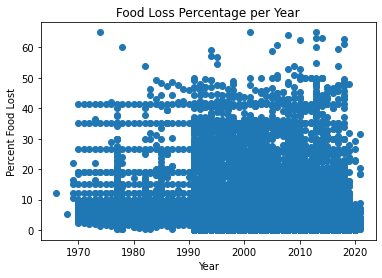

In [12]:
# Evaluate Food Loss over Time

#Create x and y and plot
x = df['year']
y = df['loss_percentage']

plt.plot(x,y,'o')
plt.title('Food Loss Percentage per Year')
plt.xlabel('Year')
plt.ylabel('Percent Food Lost')
plt.show()





In [13]:
df['decades'] = (10 * (df['year'] // 10))
# x = df['decades']


# plt.plot(x,y,'o')
# plt.title('Food Loss Percentage per Year')
# plt.xlabel('Year')
# plt.ylabel('Percent Food Lost')
# plt.show()

[Text(0, 0, '1960s'),
 Text(1, 0, '1970s'),
 Text(2, 0, '1980s'),
 Text(3, 0, '1990s'),
 Text(4, 0, '2000s'),
 Text(5, 0, '2010s'),
 Text(6, 0, '2020s')]

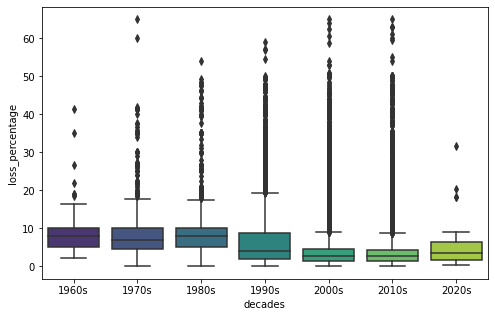

In [14]:
df['decades'] = pd.cut(df['year'], bins=range(1960, 2040, 10))
plt.figure(figsize=(8,5))
ax = sns.boxplot(x="decades", y="loss_percentage", data=df, palette = "viridis")
# ax.set_xticks([0, 1, 2, 3, 4, 5, 6 ], labels=["1960s", "1970s", "1980s", "1990s", "2000s", "2010s"])
ax.set_xticklabels(["1960s", "1970s", "1980s", "1990s", "2000s", "2010s", "2020s"])


Data shows that in recent years, Food loss porcentage has decreased. Our initial thoughts on the data hold true, and it is clearly shown now. The interquartile range (where the center 50 percent of the data lies) expands and increases from 1960 to 1980, then contracts and decreases from 1980 to 2020, with a slight increase in the current decade. 

Our earlier graph showed strong clusters below 20 percent in recent years. This new visualization shows us that more recent data is actually highly concentrated below 10 percent. This clarification shows that current food waste incidents have historically very low loss percentages. 

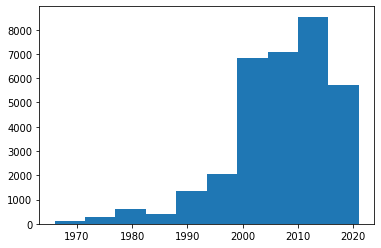

In [15]:
#Make histogram of year
x = df['year']
y = df['loss_percentage']
plt.hist(x)
plt.show()

As the histogram shows, while percent loss of any incident has decreased significantly from its height, the number of incidents seems to be very high historically. Historically 



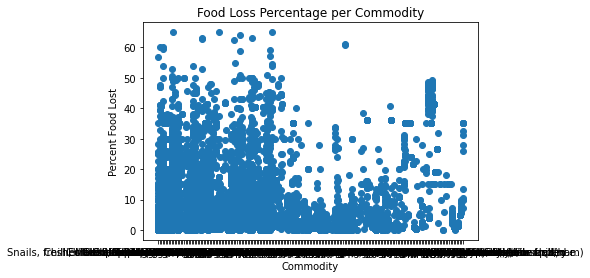

In [16]:
#Evaluate Commodities with largest waste 

#5 commodities with largest waste
x = df['commodity']
y = df['loss_percentage']


plt.plot(x,y,'o')
plt.title('Food Loss Percentage per Commodity')
plt.xlabel('Commodity')
plt.ylabel('Percent Food Lost')
plt.show()



We have now run into a problem. There are far too many crops to reasonably plot together. We could do many things to work around this problem such as creating categories and sorting those crops into those categories, creating many different plots, or by limiting which crops we look at.

## Commodity Groups

In [17]:
#Convert type to string
df['cpc_code'] = df['cpc_code'].astype(str)

In [18]:
df['category'] = ['Other crops (stimulants, spices, sugar, etc.)' if cpc.startswith(('0137', '016','018', '029')) 
                  else 'Cereals & Pulses' if cpc.startswith(('11', '23','17'))
                  else 'Fruits And Vegetables' if cpc.startswith(('012', '013'))
                  else 'Animals products; Fish and fish products' if cpc.startswith('21')
                  else 'Roots, Tubers & Oil-Bearing Crops'
                  for cpc in df['cpc_code']]
df.tail()

,m49_code,country,cpc_code,commodity,year,loss_percentage,loss_percentage_original,activity,food_supply_stage,method_data_collection,decades,category
32942,894,Zambia,112,Maize (corn),1977,4.05,1.7-6.4,Unknown,Storage,Case Study,"(1970, 1980]",Cereals & Pulses
32943,894,Zambia,112,Maize (corn),1977,3.00,3,Unknown,Storage,Case Study,"(1970, 1980]",Cereals & Pulses
32944,894,Zambia,112,Maize (corn),1977,3.50,2.0-5,Unknown,Storage,Case Study,"(1970, 1980]",Cereals & Pulses
32945,894,Zambia,112,Maize (corn),1977,13.00,13,Unknown,Storage,Case Study,"(1970, 1980]",Cereals & Pulses
32946,894,Zambia,112,Maize (corn),1977,9.00,9,Unknown,Storage,Case Study,"(1970, 1980]",Cereals & Pulses


In [19]:
df['category'].nunique()

5

In [20]:
#Download Database with Commodity Groups
df.to_csv('dfcategory2.csv', encoding='utf-8', index=False)


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Roots, Tubers & Oil-Bearing Crops'),
  Text(1, 0, 'Fruits And Vegetables'),
  Text(2, 0, 'Animals products; Fish and fish products'),
  Text(3, 0, 'Other crops (stimulants, spices, sugar, etc.)'),
  Text(4, 0, 'Cereals & Pulses')])

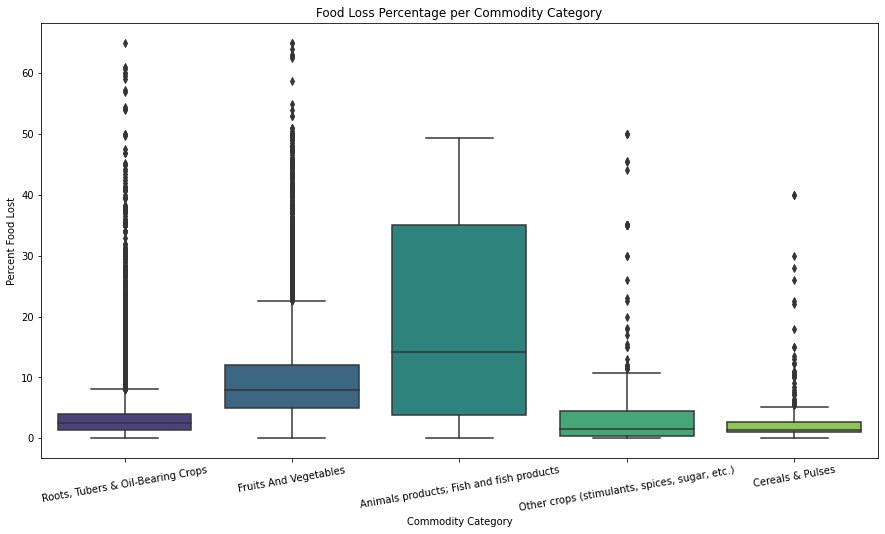

In [21]:
#Create appropriate x and y and plot with dots
x = df['category']
y = df['loss_percentage']
plt.figure(figsize=(15,8))

ax = sns.boxplot(x="category", y="loss_percentage", data=df, palette = "viridis")

# plt.plot(x,y,'o')
plt.title('Food Loss Percentage per Commodity Category')
plt.xlabel('Commodity Category')
plt.ylabel('Percent Food Lost')
plt.xticks(rotation=10)


Animals have the more percent loss

In [22]:
df_cat_mean = df.groupby('category')['loss_percentage'].mean()


In [23]:
df_cat

NameError: name 'df_cat' is not defined

In [24]:
df_cat_fq = df['category'].value_counts()
pd.DataFrame(df_cat_fq)

,category
"Roots, Tubers & Oil-Bearing Crops",25051
Fruits And Vegetables,6161
Animals products; Fish and fish products,709
Cereals & Pulses,578
"Other crops (stimulants, spices, sugar, etc.)",448


In [25]:
#More frequent 
df_com_fq = df['commodity'].value_counts()
pd.DataFrame(df_com_fq).head(10)

,commodity
Maize (corn),5558
Rice,4488
Sorghum,3464
Millet,3449
Wheat,2287
Barley,980
Fonio,921
Potatoes,881
Tomatoes,395
"Hen eggs in shell, fresh",343


In [26]:
df_country_fq = df['country'].value_counts()
pd.DataFrame(df_country_fq).head(10)

,country
United States of America,3171
India,1218
Ethiopia,933
Kenya,899
Uganda,798
Peru,767
Senegal,765
Malawi,757
Ghana,755
Zambia,743


In [27]:
df

,m49_code,country,cpc_code,commodity,year,loss_percentage,loss_percentage_original,activity,food_supply_stage,method_data_collection,decades,category
0,104,Myanmar,0142,"Groundnuts, excluding shelled",2009,5.22,5.22%,Unknown,Whole supply chain,FAO's annual Agriculture Production Questionna...,"(2000, 2010]","Roots, Tubers & Oil-Bearing Crops"
1,104,Myanmar,0142,"Groundnuts, excluding shelled",2008,5.43,5.43%,Unknown,Whole supply chain,FAO's annual Agriculture Production Questionna...,"(2000, 2010]","Roots, Tubers & Oil-Bearing Crops"
2,104,Myanmar,0142,"Groundnuts, excluding shelled",2007,5.61,5.61%,Unknown,Whole supply chain,FAO's annual Agriculture Production Questionna...,"(2000, 2010]","Roots, Tubers & Oil-Bearing Crops"
3,104,Myanmar,0142,"Groundnuts, excluding shelled",2006,5.40,5.4%,Unknown,Whole supply chain,FAO's annual Agriculture Production Questionna...,"(2000, 2010]","Roots, Tubers & Oil-Bearing Crops"
4,104,Myanmar,0142,"Groundnuts, excluding shelled",2005,5.00,5%,Unknown,Whole supply chain,FAO's annual Agriculture Production Questionna...,"(2000, 2010]","Roots, Tubers & Oil-Bearing Crops"
...,...,...,...,...,...,...,...,...,...,...,...,...
32942,894,Zambia,112,Maize (corn),1977,4.05,1.7-6.4,Unknown,Storage,Case Study,"(1970, 1980]",Cereals & Pulses
32943,894,Zambia,112,Maize (corn),1977,3.00,3,Unknown,Storage,Case Study,"(1970, 1980]",Cereals & Pulses
32944,894,Zambia,112,Maize (corn),1977,3.50,2.0-5,Unknown,Storage,Case Study,"(1970, 1980]",Cereals & Pulses
32945,894,Zambia,112,Maize (corn),1977,13.00,13,Unknown,Storage,Case Study,"(1970, 1980]",Cereals & Pulses


In [28]:


search_df = df.loc[df['year'] ==2011]
search_df.head(3)



,m49_code,country,cpc_code,commodity,year,loss_percentage,loss_percentage_original,activity,food_supply_stage,method_data_collection,decades,category
220,108,Burundi,0111,Wheat,2011,3.50,3.5,"Shelling, Threshing",Farm,Modelled Estimates,"(2010, 2020]","Roots, Tubers & Oil-Bearing Crops"
221,108,Burundi,0111,Wheat,2011,4.43,4.43,"Drying, Harvesting",Harvest,Modelled Estimates,"(2010, 2020]","Roots, Tubers & Oil-Bearing Crops"
222,108,Burundi,0111,Wheat,2011,2.50,2.5,Transportation,Farm,Modelled Estimates,"(2010, 2020]","Roots, Tubers & Oil-Bearing Crops"


In [29]:
search_df['loss_percentage'].mean()


4.358374732824427

Categories

1. Cereals & Pulses; ('11','23','17')
2. Fruits And Vegetables;('',
3. Roots, Tubers & Oil-Bearing Crops;
4. Animals products; Fish and fish products
5. Other crops (stimulants, spices, sugar, etc.)

## Food Supply Stage

In [30]:
sorted_df = df.sort_values(by='loss_percentage',ascending=True)
sorted_df

,m49_code,country,cpc_code,commodity,year,loss_percentage,loss_percentage_original,activity,food_supply_stage,method_data_collection,decades,category
24974,756,Switzerland,01510,Potatoes,2015,0.003000,0.003,Unknown,Wholesale,Modelled Estimates,"(2010, 2020]","Roots, Tubers & Oil-Bearing Crops"
24975,756,Switzerland,01510,Potatoes,2015,0.008000,0.008,Unknown,Processing,Modelled Estimates,"(2010, 2020]","Roots, Tubers & Oil-Bearing Crops"
28275,840,United States of America,02122,Sheep,2010,0.009196,0.009195652,Unknown,Harvest,Survey,"(2000, 2010]","Roots, Tubers & Oil-Bearing Crops"
10060,356,India,0141,Soya beans,2006,0.010000,0.01,Storage,Storage,Unknown,"(2000, 2010]","Roots, Tubers & Oil-Bearing Crops"
1479,124,Canada,0115,Barley,1991,0.010000,0.01%,Unknown,Whole supply chain,FAO's annual Agriculture Production Questionna...,"(1990, 2000]","Roots, Tubers & Oil-Bearing Crops"
...,...,...,...,...,...,...,...,...,...,...,...,...
28013,840,United States of America,01251,Carrots and turnips,2014,63.000000,63%,Retailing,Retail,Literature Review,"(2010, 2020]",Fruits And Vegetables
28453,840,United States of America,01317,Papayas,2008,64.000000,64%,"Consumption, Retailing",Households,Modelled Estimates,"(2000, 2010]",Fruits And Vegetables
10321,36,Australia,01213,Cauliflowers and broccoli,2013,65.000000,65%,Processing,Processing,Survey,"(2010, 2020]",Fruits And Vegetables
12964,410,Republic of Korea,01354,Strawberries,2001,65.000000,65%,Transportation,Transport,Literature Review,"(2000, 2010]",Fruits And Vegetables


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Post-harvest'),
  Text(1, 0, 'Households'),
  Text(2, 0, 'Unknown'),
  Text(3, 0, 'Market'),
  Text(4, 0, 'Retail'),
  Text(5, 0, 'Food Services'),
  Text(6, 0, 'Export'),
  Text(7, 0, 'Trader'),
  Text(8, 0, 'Wholesale'),
  Text(9, 0, 'Grading'),
  Text(10, 0, 'Distribution'),
  Text(11, 0, 'Whole supply chain'),
  Text(12, 0, 'Pre-harvest'),
  Text(13, 0, 'Processing'),
  Text(14, 0, 'Packing'),
  Text(15, 0, 'Harvest'),
  Text(16, 0, 'Storage'),
  Text(17, 0, 'Farm'),
  Text(18, 0, 'Stacking'),
  Text(19, 0, 'Transport')])

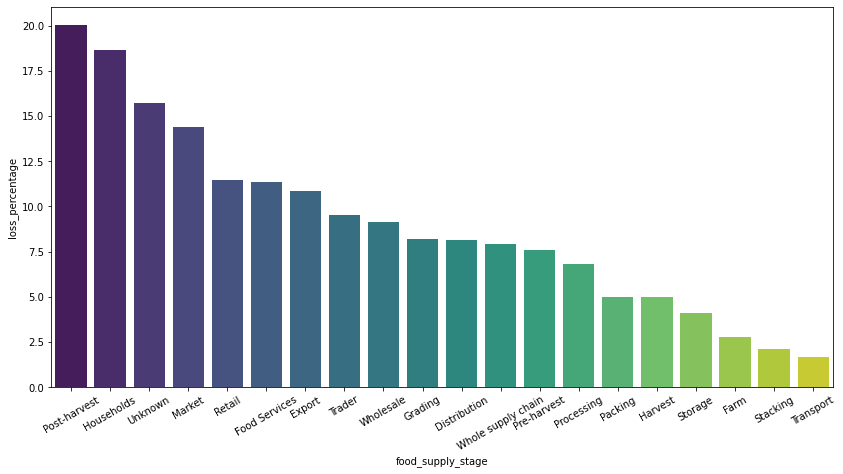

In [31]:
df_sorted_supply = pd.DataFrame(df.groupby('food_supply_stage')['loss_percentage'].mean().sort_values(ascending=False)).reset_index()
plt.figure(figsize=(14,7))
ax = sns.barplot(x="food_supply_stage", y="loss_percentage", data=df_sorted_supply, palette = "viridis")
plt.xticks(rotation=30)


According to the data, the largest food loss occurs at the Post Harvest, Household and Market stages.


Also, it is worth noting that there is incomplete or 'Unknown' data to determine at what stage significant food loss happens. 
 

In [32]:
df_stage_fq = df['food_supply_stage'].value_counts()
df_stage_fq

Farm                  12465
Whole supply chain    10464
Harvest                3724
Storage                2835
Transport              1862
Retail                  447
Processing              285
Wholesale               275
Households              181
Post-harvest            113
Trader                   90
Unknown                  72
Export                   50
Market                   17
Packing                  17
Food Services            16
Pre-harvest              12
Grading                  11
Distribution             10
Stacking                  1
Name: food_supply_stage, dtype: int64

In [33]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [34]:
groups_df = pd.read_csv ('CPC21.csv')
groups_df

,ID,CPC21code,CPC21title,CPC21ExplanatoryNote
0,1,0,"Agriculture, forestry and fishery products",NaN
1,2,1,"Products of agriculture, horticulture and mark...",NaN
2,3,11,Cereals,"This group includes cereals, i.e. annual plant..."
3,4,111,Wheat,NaN
4,5,1111,"Wheat, seed","This subclass includes:\r\n- wheat, species of..."
...,...,...,...,...
4591,4696,86221,Oil and gas extraction services on resources o...,This subclass includes:\r\n- operation of a oi...
4592,4697,86229,Other mining services on resources owned by ot...,This subclass includes:\r\n- operation of othe...
4593,4698,84120,Fixed telephony services,This subclass includes:\r\n- provision of acce...
4594,4699,86152,Aquaculture services on inputs owned by others,This subclass includes:\r\n- operation of an a...


In [35]:
df_com = df.groupby('commodity')['loss_percentage'].mean()


In [36]:
df_com  = pd.DataFrame(df_com)

In [37]:
df_com.sort_values(by=['loss_percentage'], ascending = False)


,loss_percentage
commodity,
"Snails, fresh, chilled, frozen, dried, salted or in brine, except sea snails",50.000000
Grapefruit juice,43.716671
Orange juice,41.852753
"Meat of pig with the bone, fresh or chilled",40.910000
Pineapple juice,40.806634
...,...
Raw cane or beet sugar (centrifugal only),0.621667
"Meat of cattle boneless, fresh or chilled",0.570000
Cheese from Whole Cow Milk,0.352381


<AxesSubplot:>

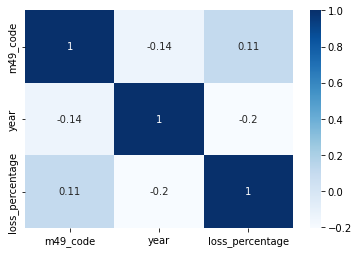

In [38]:

sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

In [39]:
#df.sort_values(by=["commodity"]) 

In [40]:
# df['year']='2021'
# df

In [41]:
df.shape

(32947, 12)

In [42]:
country_df = df.groupby('country')['commodity']['loss_quantity']
pd.DataFrame(country_df)

IndexError: Column(s) commodity already selected

In [43]:
year_df = df.groupby('year')['loss_quantity']
pd.DataFrame(year_df)

KeyError: 'Column not found: loss_quantity'

In [44]:
country_df.plot(kind="bar")

NameError: name 'country_df' is not defined

Comments and limitations:
Food losses are an extremely complex phenomenon to measure because they are multi-dimensional and
data collection is costly.
A major limitation is data availability. The reported data accounts for a small percentage or the data
needs: only 23 countries out of 185 reported on losses in 2016 for one commodity or more and only 4.4%
of loss factors in the SUA/FBS database are officially reported, all others being estimated
The index is limited in scope as harvest losses cannot be included in the international indicator for
comparability reasons. Moreover, the index covers ten key commodities in each country, because
requesting regular loss data for a larger number of crops would be a difficult and unsustainable exercise
for most countries.
The index covers quantitative losses only, that challenging enough to measure. Qualitative and economic
losses are also very relevant but less consistent out of the scope of the indicator.
This indicator is particularly challenging for countries because it requires several surveys to collect all the
necessary information along the supply chain. The most appropriate data sources would be an ensemble
of surveys however, most countries lack the capacity and resources to carry out this exercise. A suite of
statistical and modelling tools, combined where possible with administrative records will have to be used.

Moving from global food loss and waste estimates to the commodity, country, and stage level will vastly improve our knowledge of the food losses problem and present opportunities for intervention.

In [45]:
df_fao = pd.read_excel('faoStats.xlsx')
df_fao

,Indicator,SeriesID,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,Source,FootNote,Nature,Units,Reporting Type,SeriesCode
0,12.3.1,3089,Global food loss index [12.3.1] (2015=100),1,World,2016,98.69,2016,FAO,NaN,M,Index,G,AG_FLS_IDX
1,12.3.1,3089,Global food loss index [12.3.1] (2015=100),513,Europe and Northern America,2016,99.49,2016,FAO,NaN,M,Index,G,AG_FLS_IDX
2,12.3.1,3089,Global food loss index [12.3.1] (2015=100),543,Oceania (exc. Australia and New Zealand),2016,99.11,2016,FAO,NaN,M,Index,G,AG_FLS_IDX
3,12.3.1,3089,Global food loss index [12.3.1] (2015=100),747,Northern Africa and Western Asia,2016,94.36,2016,FAO,NaN,M,Index,G,AG_FLS_IDX
4,12.3.1,3089,Global food loss index [12.3.1] (2015=100),753,Eastern and South-Eastern Asia,2016,99.06,2016,FAO,NaN,M,Index,G,AG_FLS_IDX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,12.3.1,3089,Food Loss Percentage (%),34,Southern Asia (MDG=M49),2020,13.90,2020,FAO,NaN,M,PERCENT,G,AG_FLS_IDX
128,12.3.1,3089,Food Loss Percentage (%),39,Southern Europe (M49),2020,7.10,2020,FAO,NaN,M,PERCENT,G,AG_FLS_IDX
129,12.3.1,3089,Food Loss Percentage (%),11,Western Africa (M49),2020,24.80,2020,FAO,NaN,M,PERCENT,G,AG_FLS_IDX
130,12.3.1,3089,Food Loss Percentage (%),145,Western Asia (M49),2020,14.10,2020,FAO,NaN,M,PERCENT,G,AG_FLS_IDX


In [46]:
df_fao.to_csv('csvfile.csv', encoding='utf-8', index=False)


Hypothesis

In [49]:
from sklearn.linear_model import LinearRegression


In [50]:
#Take the decade and percent lost columns and reshape them for regression
x = df["decades"]
y = df["loss_percentage"]
X = np.array(x).reshape(-1, 1)
y2 = np.array(y).reshape(-1, 1)
#Run regression and predict an output
reg = LinearRegression().fit(X, y2)
Y = reg.predict(X)
#Plot the output against the original data
plt.plot(x, y, 'o', color='black')
plt.plot(X, Y, color ='k')
plt.title("Percent Food Lost Versus Year Linear Regression")
plt.xlabel("Year")
plt.ylabel("Percent Food Lost in Incident")
plt.show()

TypeError: float() argument must be a string or a number, not 'pandas._libs.interval.Interval'